#### Downlad the dataset

In [1]:
#Download both images and annotations
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [2]:
#Check current directory to make sure data is downloaded
!ls -l

total 792092
-rw-r--r-- 1 root root  19173078 Jul 29  2022 annotations.tar.gz
-rw-r--r-- 1 root root 791918971 Jul 29  2022 images.tar.gz
drwxr-xr-x 1 root root      4096 Mar 14 13:27 sample_data


In [3]:
#unzip the tar files downloaded abve
!tar xf images.tar.gz
!tar xf annotations.tar.gz

In [4]:
#Explore directories
!ls -l

total 792400
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jul 29  2022 annotations.tar.gz
drwxr-xr-x 2 1001  1001    307200 Jun 18  2012 images
-rw-r--r-- 1 root root  791918971 Jul 29  2022 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 14 13:27 sample_data


In [5]:
#Check the xml annotations
!ls -l annotations/xmls

total 14744
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_100.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_101.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_102.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_103.xml
-rw-r--r-- 1 501 staff 496 Jun 29  2012 Abyssinian_105.xml
-rw-r--r-- 1 501 staff 499 Jun 29  2012 Abyssinian_106.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_107.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_108.xml
-rw-r--r-- 1 501 staff 493 Jun 29  2012 Abyssinian_109.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_10.xml
-rw-r--r-- 1 501 staff 493 Jun 29  2012 Abyssinian_110.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_111.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_112.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_113.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_114.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_115.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyss

In [6]:
#Install tidy to review xml files
!sudo apt-get install tidy --quiet

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libtidy5deb1
The following NEW packages will be installed:
  libtidy5deb1 tidy
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 267 kB of archives.
After this operation, 1,130 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libtidy5deb1 amd64 2:5.6.0-11ubuntu0.22.04.1 [238 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 tidy amd64 2:5.6.0-11ubuntu0.22.04.1 [29.7 kB]
Fetched 267 kB in 1s (318 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling

In [7]:
#Check one of the xml file to understand annotations
!tidy -xml -i annotations/xmls/wheaten_terrier_170.xml

No warnings or errors were found.

<annotation>
  <folder>OXIIIT</folder>
  <filename>wheaten_terrier_170.jpg</filename>
  <source>
    <database>OXFORD-IIIT Pet Dataset</database>
    <annotation>OXIIIT</annotation>
    <image>flickr</image>
  </source>
  <size>
    <width>500</width>
    <height>330</height>
    <depth>3</depth>
  </size>
  <segmented>0</segmented>
  <object>
    <name>dog</name>
    <pose>Frontal</pose>
    <truncated>0</truncated>
    <occluded>0</occluded>
    <bndbox>
      <xmin>181</xmin>
      <ymin>126</ymin>
      <xmax>299</xmax>
      <ymax>239</ymax>
    </bndbox>
    <difficult>0</difficult>
  </object>
</annotation>

About HTML Tidy: https://github.com/htacg/tidy-html5
Bug reports and comments: https://github.com/htacg/tidy-html5/issues
Official mailing list: https://lists.w3.org/Archives/Public/public-htacg/
Latest HTML specification: http://dev.w3.org/html5/spec-author-view/
Validate your HTML documents: http://validator.w3.org/nu/
Lobby your company 

#### Convert XML to CSV

In [8]:
#Move all xml files to images folder, this is needed for python script used next
!mv annotations/xmls/* images/

In [9]:
#Mount Google drive (change code for local machine). We need to copy generate_dataset.py script to current directory
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [10]:
#Copy generate_dataset.py file to current directory
!cp "/gdrive/My Drive/ML Content/ACV - I/Notebooks/Localization/generate_dataset.py" .

In [11]:
!ls -l

total 792556
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jul 29  2022 annotations.tar.gz
-rw------- 1 root root       3344 Mar 17 07:00 generate_dataset.py
drwxr-xr-x 2 1001  1001    462848 Mar 17 07:00 images
-rw-r--r-- 1 root root  791918971 Jul 29  2022 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 14 13:27 sample_data


In [12]:
#Build csv file for both training and test dataset
!python generate_dataset.py

class english_setter: 100 images
class pug: 100 images
class american_pit_bull_terrier: 100 images
class miniature_pinscher: 100 images
class pomeranian: 100 images
class german_shorthaired: 100 images
class egyptian_mau: 92 images
class chihuahua: 100 images
class bombay: 100 images
class birman: 100 images
class persian: 100 images
class beagle: 100 images
class wheaten_terrier: 100 images
class russian_blue: 100 images
class american_bulldog: 100 images
class staffordshire_bull_terrier: 100 images
class newfoundland: 100 images
class yorkshire_terrier: 100 images
class ragdoll: 99 images
class bengal: 98 images
class great_pyrenees: 100 images
class basset_hound: 100 images
class saint_bernard: 99 images
class english_cocker_spaniel: 100 images
class scottish_terrier: 100 images
class keeshond: 100 images
class leonberger: 100 images
class japanese_chin: 100 images
class siamese: 100 images
class shiba_inu: 100 images
class british_shorthair: 100 images
class abyssinian: 99 images
c

In [13]:
!ls -l

total 792800
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jul 29  2022 annotations.tar.gz
-rw------- 1 root root       3344 Mar 17 07:00 generate_dataset.py
drwxr-xr-x 2 1001  1001    462848 Mar 17 07:00 images
-rw-r--r-- 1 root root  791918971 Jul 29  2022 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 14 13:27 sample_data
-rw-r--r-- 1 root root     198675 Mar 17 07:00 train.csv
-rw-r--r-- 1 root root      46697 Mar 17 07:00 validation.csv


#### Visualize Data

In [14]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [15]:
#Read csv file as pandas dataframe, csv file has no header
train_df = pd.read_csv('train.csv', header=None,
                       names=['File', 'Height','Width','xmin',
                              'ymin','xmax', 'ymax','Class','Label'])

In [16]:
print(train_df.shape)
train_df.head()

(2984, 9)


,File,Height,Width,xmin,ymin,xmax,ymax,Class,Label
0,images/english_setter_119.jpg,349,500,298,66,442,183,english_setter,0
1,images/english_setter_142.jpg,500,333,98,120,273,266,english_setter,0
2,images/english_setter_18.jpg,335,500,187,28,316,162,english_setter,0
3,images/english_setter_136.jpg,500,353,146,19,301,148,english_setter,0
4,images/english_setter_179.jpg,500,334,1,59,314,315,english_setter,0


In [17]:
#Create a dictionary to hold label and corresponding class name
num_classes = train_df['Label'].unique()
label_class_dict = dict(zip(train_df['Label'], train_df['Class']))
#label_class_dict

In [18]:
num_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [19]:
label_class_dict

{0: 'english_setter',
 1: 'pug',
 2: 'american_pit_bull_terrier',
 3: 'miniature_pinscher',
 4: 'pomeranian',
 5: 'german_shorthaired',
 6: 'egyptian_mau',
 7: 'chihuahua',
 8: 'bombay',
 9: 'birman',
 10: 'persian',
 11: 'beagle',
 12: 'wheaten_terrier',
 13: 'russian_blue',
 14: 'american_bulldog',
 15: 'staffordshire_bull_terrier',
 16: 'newfoundland',
 17: 'yorkshire_terrier',
 18: 'ragdoll',
 19: 'bengal',
 20: 'great_pyrenees',
 21: 'basset_hound',
 22: 'saint_bernard',
 23: 'english_cocker_spaniel',
 24: 'scottish_terrier',
 25: 'keeshond',
 26: 'leonberger',
 27: 'japanese_chin',
 28: 'siamese',
 29: 'shiba_inu',
 30: 'british_shorthair',
 31: 'abyssinian',
 32: 'maine_coon',
 33: 'sphynx',
 34: 'samoyed',
 35: 'boxer',
 36: 'havanese'}

Show images with bounding box

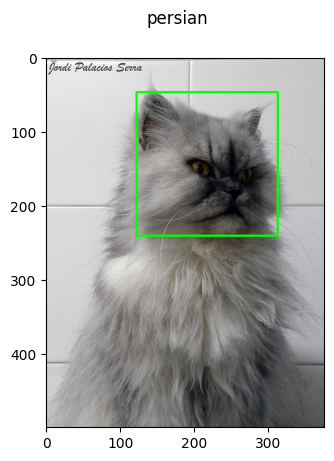

In [20]:
#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])

#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
cv2.rectangle(img,
             (train_df.loc[img_num, 'xmin'],train_df.loc[img_num, 'ymin']),
             (train_df.loc[img_num, 'xmax'],train_df.loc[img_num, 'ymax']),
             (0,255,0),
             2)
#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [21]:
#Read the validation csv file
test_df = pd.read_csv('validation.csv', header=None,
                       names=['File', 'Height','Width','xmin',
                              'ymin','xmax', 'ymax','Class','Label'])

#### Define Augmentations

In [22]:
#Install imgaug
!pip install imgaug --quiet

In [23]:
import imgaug as ia
from imgaug import augmenters as iaa

In [24]:
img_size = 224
img_depth = 3

Training Augmentation Sequence

In [32]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
#sometimes = lambda aug: iaa.Sometimes(0.5, aug)

train_seq = iaa.Sequential([
    #horizontal flips 50% of the time
    iaa.Fliplr(0.5),
    #Resize all images to a specific size
    iaa.Resize({"height": img_size, "width": img_size}),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    # change brightness, DOES NOT AFFECT BBs
    iaa.Multiply((1.0, 1.5), per_channel=0.2),
    # translate by 40/60px on x/y axis
    # Rotate between 25 and -25 degrees
    # THIS AFFECTs BBs
    iaa.Sometimes(0.5, [iaa.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-25, 25),
    )])
])

Test Augmentation Sequence

In [25]:
test_seq = iaa.Sequential([
    #Resize all images to a specific size
    iaa.Resize({"height": img_size, "width": img_size})
])

Function to apply augmentation sequence on images

In [26]:
#Augmentation function to apply on a batch
def apply_aug(images, bboxes, aug_seq):

    #Number of images to process
    img_count = len(images)

    #Make sequence deterministic
    seq_det = aug_seq.to_deterministic()

    #Initialize boxes for all images
    boxes = []

    for i in range(img_count):

        b_box = ia.BoundingBox(x1 = bboxes[i][0],
                               y1 = bboxes[i][1],
                               x2 = bboxes[i][2],
                               y2 = bboxes[i][3])

        boxes.append(ia.BoundingBoxesOnImage([b_box], shape=images[i].shape))

    #Perform image and BBs augmentation
    image_aug = seq_det.augment_images(images)
    bbs_aug = seq_det.augment_bounding_boxes(boxes)

    b_images = np.zeros((img_count,img_size, img_size,img_depth))
    b_bboxes = np.zeros((img_count, 4))

    for i in range(img_count):
        b_images[i] = image_aug[i]
        box_new = bbs_aug[i].bounding_boxes[0]
        b_bboxes[i] = [box_new.x1,
                       box_new.y1,
                       box_new.x2 - box_new.x1,
                       box_new.y2- box_new.y1]
    return b_images, b_bboxes

#### Build a Batch Generator

In [27]:
import tensorflow as tf

In [35]:
def batch_generator(df, batch_size=32, train_mode=True):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))

        #Classification Labels
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))

        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))

        #List to hold all images which will be augmented
        all_images = []

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'])

            #Conver to numpy array - also set it to unsigned int8 data type as required by imgaug
            img_array = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')

            #Update batch
            all_images.append(img_array)

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']

            xmin = df.loc[image_nums[i], 'xmin']
            xmax = df.loc[image_nums[i], 'xmax']

            ymin = df.loc[image_nums[i], 'ymin']
            ymax = df.loc[image_nums[i], 'ymax']

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax, ymax]

        #Apply augmentation
        if(train_mode):
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, train_seq)
        else:
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, test_seq)

        #Normalize batch images as per Pre-trained model to be used
        batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)

        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [36]:
gen = batch_generator(train_df, batch_size=2)

In [37]:
X, y = next(gen)

In [38]:
X.shape

(2, 224, 224, 3)

#### Build the Model

Load Pre-Trained Model

In [39]:
tf.keras.backend.clear_session()
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, 3),
                                          weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


Freeze all layers of Pre-trained model

In [40]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [41]:
len(model.layers)

175

In [42]:
for layer in model.layers:
    layer.trainable = False

In [43]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Add layers

In [44]:
#get Output layer of Pre-trained model
x1 = model.output

#Add Dropout
#x2 = tf.keras.layers.Dropout(0.5)(x1)

#Add a convolution layer
#x3 = tf.keras.layers.Conv2D(50, (1,1), activation='relu')(x2)
x3 = tf.keras.layers.Conv2D(32, (1,1), activation='relu')(x1)

#Flatten the output to feed to Dense layer
x4 = tf.keras.layers.Flatten()(x3)

#Batch Norm
x5 = tf.keras.layers.BatchNormalization()(x4)

In [45]:
x1

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [46]:
x2

NameError: name 'x2' is not defined

In [ ]:
x3

In [ ]:
x4

In [47]:
x5

<KerasTensor: shape=(None, 1568) dtype=float32 (created by layer 'batch_normalization')>

Build layer for Label output

In [48]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), activation='softmax', name='class_op')(x5)

Build layer for bounding box output

In [49]:
#Regression
bbox_output = tf.keras.layers.Dense(4 , activation='sigmoid', name='reg_op')(x5)

Finalize the model

In [50]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

Define IoU Metrics

In [51]:
def calculate_iou(y_true, y_pred):


    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).

    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.

    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)

    """


    results = []

    for i in range(0,y_true.shape[0]):

        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br])

        # Calculate the area of boxInt, i.e. the area of the intersection
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.


        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)

        # append the result to a list at the end of each loop
        results.append(iou)

    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):

    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours
    # trying to debug and almost give up.

    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [52]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("pets.h5", save_best_only=True, verbose=1)

In [53]:
final_model.compile(optimizer='adam',
                    #loss=['categorical_crossentropy', 'mae'],
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [54]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

Train the model

In [55]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize, train_mode=True) #batchsize can be changed
test_generator = batch_generator(test_df, batch_size=batchsize, train_mode=False)

In [56]:
final_model.fit(train_generator,
                epochs=3,
                steps_per_epoch= train_df.shape[0]//batchsize,
                validation_data=test_generator,
                validation_steps = test_df.shape[0]//batchsize,
                callbacks=[model_checkpoint])

Epoch 1/3
46/46 [==============================] - ETA: 0s - loss: 2.4311 - class_op_loss: 2.3343 - reg_op_loss: 0.0968 - class_op_accuracy: 0.3845 - reg_op_IoU: 0.1008
Epoch 1: val_loss improved from inf to 1.52542, saving model to pets.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


46/46 [==============================] - 56s 948ms/step - loss: 2.4311 - class_op_loss: 2.3343 - reg_op_loss: 0.0968 - class_op_accuracy: 0.3845 - reg_op_IoU: 0.1008 - val_loss: 1.5254 - val_class_op_loss: 1.4372 - val_reg_op_loss: 0.0882 - val_class_op_accuracy: 0.6313 - val_reg_op_IoU: 0.1218
Epoch 2/3
46/46 [==============================] - ETA: 0s - loss: 0.8102 - class_op_loss: 0.7600 - reg_op_loss: 0.0501 - class_op_accuracy: 0.7748 - reg_op_IoU: 0.1949
Epoch 2: val_loss improved from 1.52542 to 0.79943, saving model to pets.h5
46/46 [==============================] - 33s 733ms/step - loss: 0.8102 - class_op_loss: 0.7600 - reg_op_loss: 0.0501 - class_op_accuracy: 0.7748 - reg_op_IoU: 0.1949 - val_loss: 0.7994 - val_class_op_loss: 0.7457 - val_reg_op_loss: 0.0537 - val_class_op_accuracy: 0.7859 - val_reg_op_IoU: 0.1524
Epoch 3/3
46/46 [==============================] - ETA: 0s - loss: 0.4896 - class_op_loss: 0.4572 - reg_op_loss: 0.0323 - class_op_accuracy: 0.8621 - reg_op_IoU: 0

In [57]:
final_model.compile(optimizer='adam',
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    loss_weights={'reg_op':20, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [58]:
final_model.fit(train_generator,
                epochs=50,
                initial_epoch=3,
                steps_per_epoch= train_df.shape[0]//batchsize,
                validation_data=test_generator,
                validation_steps = test_df.shape[0]//batchsize,
                callbacks=[model_checkpoint])

Epoch 4/50
46/46 [==============================] - ETA: 0s - loss: 0.7904 - class_op_loss: 0.3687 - reg_op_loss: 0.0211 - class_op_accuracy: 0.8865 - reg_op_IoU: 0.3596
Epoch 4: val_loss did not improve from 0.57486
46/46 [==============================] - 43s 818ms/step - loss: 0.7904 - class_op_loss: 0.3687 - reg_op_loss: 0.0211 - class_op_accuracy: 0.8865 - reg_op_IoU: 0.3596 - val_loss: 1.0717 - val_class_op_loss: 0.6079 - val_reg_op_loss: 0.0232 - val_class_op_accuracy: 0.8313 - val_reg_op_IoU: 0.3064
Epoch 5/50
46/46 [==============================] - ETA: 0s - loss: 0.5523 - class_op_loss: 0.2563 - reg_op_loss: 0.0148 - class_op_accuracy: 0.9215 - reg_op_IoU: 0.4119
Epoch 5: val_loss did not improve from 0.57486
46/46 [==============================] - 37s 810ms/step - loss: 0.5523 - class_op_loss: 0.2563 - reg_op_loss: 0.0148 - class_op_accuracy: 0.9215 - reg_op_IoU: 0.4119 - val_loss: 1.0054 - val_class_op_loss: 0.6577 - val_reg_op_loss: 0.0174 - val_class_op_accuracy: 0.8266

In [ ]:
!ls -l

In [ ]:
final_model = tf.keras.models.load_model('pets.h5', custom_objects={'IoU':IoU})

In [ ]:
final_model.save('/gdrive/My Drive/pets.h5')

In [ ]:
final_model

#### Model Prediction

In [65]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]

    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size))
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)
    #3. Normalize image data
    input_array = tf.keras.applications.resnet50.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #print(label_pred)
    #print(bbox_pred)
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)

    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    #Draw actual bounding box
    img = cv2.rectangle(img, (xmin, ymin),
                        (xmax, ymax), (0,0,255), 2)
    #Draw predicted bounding box
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)),
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 2)

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

1/1 [==============================] - 0s 41ms/step
Real Label : chihuahua 
Predicted Label:  chihuahua


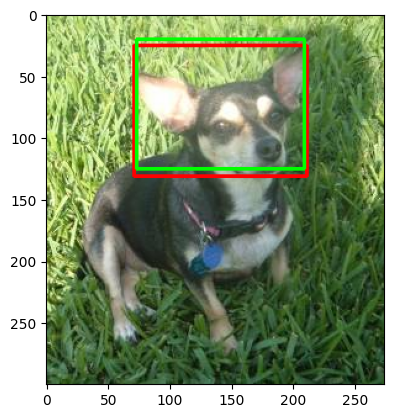

In [80]:
#Predict on Test Dataset
image_num = np.random.randint(0, test_df.shape[0])
predict_and_draw(image_num, test_df)

In [ ]:
image_num